# Assignment 01: Python, NumPy, Matplotlib and Pandas (Example Solution)
---

**Due Date:** Friday 01/24/2025 (by 5pm)

**Please fill these in before submitting, just in case I accidentally mix up file names while grading**:

Name: Jane Hacker

CWID-5: (Last 5 digits of cwid)

## Introduction 

In this assignment you have a set of 4 tasks to perform.  In each case you will be writing Python functions or code to
perform the asked for task.  In some cases you need to implement a described function in the `src/assg_tasks.py` file.
These function implementations are automatically tested in this notebook and autograded when you submit your
assignments to GitHub.  As noted in those cells, you should not modify the cells where these tests are called
and performed.

In [1]:
# The following ipython magic will reload changed file/modules.
# So when editing function in source code modules, you should
# be able to just rerun the cell, not restart the whole kernel.
%load_ext autoreload
%autoreload 2

In [2]:
# assignment wide imports go here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

In [3]:
# Import functions/moduls from this project.  We manually set the
# PYTHONPATH to append the location to search for this assignments
# functions to just ensure the imports are found
import sys
sys.path.append("../src")

# assignment function imports for doctests and github autograding
# these are required for assignment autograding
from assg_utils import run_unittests, run_doctests
from assg_tasks import fibonacci_inefficient, fibonacci_efficient
from assg_tasks import task_2_numpy_operations
from assg_tasks import iterate_julia_set
from assg_tasks import task_4_dataframe_information
from assg_tasks import task_4_dataframe_mutate

## Task 1: Python Functions, Recursion and Memoization
----

Memoization is a technique that uses a dictionary to cache computed results.
Memoization can result in significant speed improvements for some recursive and other
types of algorithms that need a subcalculation repeated many times.

For example, an inefficient implementation of calculating the $n^{th}$
[Fibonacci number](https://en.wikipedia.org/wiki/Fibonacci_number)
might look like the following.  Do you understand why this implementation
is inefficient? It performs many redundant recursive calls, try creating a tree of
the calls for `fib(5)` that are done.  These redundant calculations quickly
(exponentially) explode the amount of work that is performed by this naive 
implementation.

In [4]:
# do not remove or modify the code in this cell
run_unittests(['test_fibonacci_inefficient'])

test_base_case_1 (test_assg_tasks.test_fibonacci_inefficient.test_base_case_1)
test_base_case_1 ... ok
test_base_case_2 (test_assg_tasks.test_fibonacci_inefficient.test_base_case_2)
test_base_case_2 ... ok
test_recursive_case_10 (test_assg_tasks.test_fibonacci_inefficient.test_recursive_case_10)
test_recursive_case_10 ... ok
test_recursive_case_3 (test_assg_tasks.test_fibonacci_inefficient.test_recursive_case_3)
test_recursive_case_3 ... ok
test_recursive_case_37 (test_assg_tasks.test_fibonacci_inefficient.test_recursive_case_37)
test_recursive_case_37 ... ok
test_recursive_case_4 (test_assg_tasks.test_fibonacci_inefficient.test_recursive_case_4)
test_recursive_case_4 ... ok

----------------------------------------------------------------------
Ran 6 tests in 2.917s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

In [5]:
# notice the time it takes because of all of the repeated, inefficient work
# I normally see over 10 seconds on average to calculate the 40th Fibonacci
# number, uncomment this to see how long it takes on your system, but might want to
# comment it out again when working on rest of assignment and before submitting your work
#%timeit fibonacci_inefficient(40)

Write an efficient version of calculating the $n^{th}$ Fibonacci number using
the memoization technique.  Your implementation needs to be done in the
`src/assg_tasks.py` file.  You have been given the function declaration
for `fibonacci_efficient()` already, put your implementation where indicated.

Your function will take 1 parameters, `n` the Fibonacci number to calculate, just
loke the inefficient version given previously as an example.  You need to declare
a global dictionary named `fib_dict` and initialize it with the base cases for
the 1st (1) and second (2) numbers in our fibonacci sequence implementation.
Put this global declaration into `src/assg_tasks.py` just above your
`fibonacci_efficient()` function implementation.

Wrte your implementation and demonstrate so that it passes the following tests.
As usual, make sure that you do not modify the cell that runs the tests of your work
for you.
Also test the time of your implementation to calculate
the $40^{th}$ Fibonacci number as we did above.  If you implement the memoization
correctly, you will find that your function only takes 100s of nano seconds, 
which is almost a billion times speed improvement.

In [6]:
# do not remove or modify the code in this cell
run_unittests(['test_fibonacci_efficient'])

test_base_case_1 (test_assg_tasks.test_fibonacci_efficient.test_base_case_1)
test_base_case_1 ... FAIL
test_base_case_2 (test_assg_tasks.test_fibonacci_efficient.test_base_case_2)
test_base_case_2 ... FAIL
test_recursive_case_10 (test_assg_tasks.test_fibonacci_efficient.test_recursive_case_10)
test_recursive_case_10 ... FAIL
test_recursive_case_3 (test_assg_tasks.test_fibonacci_efficient.test_recursive_case_3)
test_recursive_case_3 ... FAIL
test_recursive_case_37 (test_assg_tasks.test_fibonacci_efficient.test_recursive_case_37)
test_recursive_case_37 ... FAIL
test_recursive_case_4 (test_assg_tasks.test_fibonacci_efficient.test_recursive_case_4)
test_recursive_case_4 ... FAIL

FAIL: test_base_case_1 (test_assg_tasks.test_fibonacci_efficient.test_base_case_1)
test_base_case_1
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/defer.py", line 209, in maybeDeferred
    re

<unittest.runner.TextTestResult run=6 errors=0 failures=6>

In [7]:
# your time should be only 100(s) of ns now or less, where 1ns = 1e9 sec, so almost billions of
# times faster than before
%timeit fibonacci_efficient(40)

32.7 ns ± 1.09 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


## Task 2: NumPy Operations
----

In this task, you will demonstrate and practice using the NumPy library to generate the asked for arrays and manipulate them.
The purpose of this task is to familarize yourself with NumPy and with performing vectorized operations on arrays.
The operations you perform here will be reused in task 3 to implement a somewhat complex vectorized function, so make sure
you understand what is being done here. 

Create the specified NumPy arrays using NumPy library and/or vectorized operations (do not use any
loops in your following answers).

Create an array named `x` with 5 values linearly spaced from -2.0 to 2.0.  Reshape x to be a row
matrix with 1 row and 5 columns.  Your result should look like this:

```python
>>> print(x)
[[-2. -1.  0.  1.  2.]]
```

In [8]:
# create the describe array x here, make sure it is of the correct shape


Create an array named `y` with 4 values linearly spaces from -1 to 1.  Reshape y to be
a column matrix with 1 column and 4 rows.  `y` should look like this when done:

```python
>>> print(y)
[[-1.        ]
 [-0.33333333]
 [ 0.33333333]
 [ 1.        ]]
```

In [9]:
# create the describe array y of the correct shape and contents here

The `np.tile()` function can be used to repeat parts of an array.  For example, we can turn
`x` into a 4 rows by 5 columns matrix, repeating its row, like this:

In [10]:
# uncomment this for an example of how to tile your lower case x array
#X = np.tile(x, (rows,1))
#print(X)
#print(X.shape)

In the next cell demonstrate tiling the `y` column array to also be of shape `(4,5)`, but where each
column is a repeatition of the current single column in `y`.

In [11]:
# tile y's column to end up with 5 repeated columns of y, and a shape again of (4,5) here

Now demonstrate the result of doing a vectorized multiplication of the tiled result of `y` times
the complex number 0 + 1j.  The result should look like this.  Notice that the original contents
of `y` are multiplied times both the real and complex part, but since the real part is 0 you end up
only with the complex part.

```python
>>> print(Y)
array([[-0.-1.j        , -0.-1.j        , -0.-1.j        ,
        -0.-1.j        , -0.-1.j        ],
       [-0.-0.33333333j, -0.-0.33333333j, -0.-0.33333333j,
        -0.-0.33333333j, -0.-0.33333333j],
       [ 0.+0.33333333j,  0.+0.33333333j,  0.+0.33333333j,
         0.+0.33333333j,  0.+0.33333333j],
       [ 0.+1.j        ,  0.+1.j        ,  0.+1.j        ,
         0.+1.j        ,  0.+1.j        ]])

>>> print(Y.shape)
(4, 5)
```

In [12]:
# perform vectorized multiplication of Y here as described

Using the previous 2 tile commands and vectorized multiplication, create a new matrix Z that is
of shape `(5,4)`.  Z is the result of adding up the tiled of `x` and `y * 1j`.

You should get the following result.  Notice that `Z` the real part is the part from the tiled `x`
and the imaginary part comes from the tiled `y`:

```python
>>> print(Z)
[[-2.-1.j         -1.-1.j          0.-1.j          1.-1.j
   2.-1.j        ]
 [-2.-0.33333333j -1.-0.33333333j  0.-0.33333333j  1.-0.33333333j
   2.-0.33333333j]
 [-2.+0.33333333j -1.+0.33333333j  0.+0.33333333j  1.+0.33333333j
   2.+0.33333333j]
 [-2.+1.j         -1.+1.j          0.+1.j          1.+1.j
   2.+1.j        ]]
>>> print(Z.shape)
(4, 5)
```

In [13]:
# perform vectorized addition to create Z matrix as described here

In the next cell, create an array called `T` which will be used to record time stamps later on.
`T` should be the same shape as Z `(4, 5)` but filled all with 0's.

In [14]:
# Create an array called T of the same shape as Z of all zeros

Now create an array named `M` which will be used as a mask later on.  `M` should be the same shape
as `Z`, but its values should be of `dtype=bool` and all of the boolean values should initially
be set to `True`.  You should get the following results for this array named `M`:

```python
>>> print(M)
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]

>>> print(M.shape)
(4, 5)

>>> print(M.dtype)
bool
```

In [15]:
# create an array called M of the same size as Z but using dtype=bool and initially all values
# are set to True

Now create an array called `C` of complex values.  `C` should be the same shape as `Z` and it should
be filled with the complex value `-0.4 + 0.6j` for all elements.

```python
>>> print(C)
[[-0.4+0.6j -0.4+0.6j -0.4+0.6j -0.4+0.6j -0.4+0.6j]
 [-0.4+0.6j -0.4+0.6j -0.4+0.6j -0.4+0.6j -0.4+0.6j]
 [-0.4+0.6j -0.4+0.6j -0.4+0.6j -0.4+0.6j -0.4+0.6j]
 [-0.4+0.6j -0.4+0.6j -0.4+0.6j -0.4+0.6j -0.4+0.6j]]

>>> print(C.shape)
(4, 5)

>>> print(C.dtype)
complex128
```

In [16]:
# create an array called C of the same shape as Z, but all filled with the complex value
# -0.4 + 0.6j

The `np.abs()` function is a vectorized NumPy function that will compute the absolute value of an
array of values.  However, the 
[absolute value of a complex number](https://en.wikipedia.org/wiki/Absolute_value#Complex_numbers)
is defined asa function of the real and imaginary parts.  For example, try finding the
absolute value of your `Z` matrix, you should get the following result:

```python
>>> np.abs(Z)
array([[2.23606798, 1.41421356, 1.        , 1.41421356, 2.23606798],
       [2.02758751, 1.05409255, 0.33333333, 1.05409255, 2.02758751],
       [2.02758751, 1.05409255, 0.33333333, 1.05409255, 2.02758751],
       [2.23606798, 1.41421356, 1.        , 1.41421356, 2.23606798]])
```

In [17]:
# calculate the absolute value of Z here and display it, you should get the same result shown above

Perform the following vectorized calculations in this order.

1. Update the array named `M` so that it is `False` at all locations
where the absolute value of `Z` is greater than 2, and is `True` at all locations where the
absolute value of `Z` is less than or equal to 2.
2. Update `T` to be 1 for all places where the mask `M` is true
3. Update `Z` but only for the values where the mask `M` is true. Update it using the following 
quadratic formula
$$
Z = Z^2 + C
$$
This is a vectorized operation, but again only perform this update of `Z` for those values where the
mask `M` is true (**HINT**: using boolean indexing).

The result will be `(4,5)` shaped matrices in all cases, and you should get the following for
`M`, `T` and `Z` if you perform the vectorized operations correctly:

```python
>>> print(M)
[[False  True  True  True False]
 [False  True  True  True False]
 [False  True  True  True False]
 [False  True  True  True False]]

>>> print(T)
[[0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0.]]

>>> print(Z)
[[-2.        -1.j         -0.4       +2.6j        -1.4       +0.6j
  -0.4       -1.4j         2.        -1.j        ]
 [-2.        -0.33333333j  0.48888889+1.26666667j -0.51111111+0.6j
   0.48888889-0.06666667j  2.        -0.33333333j]
 [-2.        +0.33333333j  0.48888889-0.06666667j -0.51111111+0.6j
   0.48888889+1.26666667j  2.        +0.33333333j]
 [-2.        +1.j         -0.4       -1.4j        -1.4       +0.6j
  -0.4       +2.6j         2.        +1.j        ]]

```


In [18]:
# update and print M here

In [19]:
# update and print T here

In [20]:
# using M as a mask, computer Z**2 + C and put the value back into Z here

Finally to more thorougly check your work, implement the function in `src/assg_tasks.py`
named `task_2_numpy_operations()`.  You can copy all of the code you did above, and
return your final `M`, `T` an `Z`.  The tests below will check that your final
return matrices are of the correct shape, data types and contain the expected
values.

In [21]:
# do not remove or modify the code in this cell
run_unittests(['test_task_2_numpy_operations'])

test_M_results (test_assg_tasks.test_task_2_numpy_operations.test_M_results)
test_M_results ... FAIL
test_T_results (test_assg_tasks.test_task_2_numpy_operations.test_T_results)
test_T_results ... FAIL
test_Z_results (test_assg_tasks.test_task_2_numpy_operations.test_Z_results)
test_Z_results ... FAIL

FAIL: test_M_results (test_assg_tasks.test_task_2_numpy_operations.test_M_results)
test_M_results
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/defer.py", line 209, in maybeDeferred
    result = f(*args, **kwargs)
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/utils.py", line 227, in runWithWarningsSuppressed
    raise exc_info[1].with_traceback(exc_info[2])
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/utils.py", line 223, in runWithWarningsSuppressed
    result = f(*a, **kw)
  File "/workspaces/assg01/src/test_assg_tasks.py", 

<unittest.runner.TextTestResult run=3 errors=0 failures=3>

## Task 3: Vectorized Functions and Plotting
----

Using the operations to create and update `Z` in the previous task 2, we will now write a function
that will perform the update on `Z`, `T`, and `M` repeatedly.  The formula to update `Z` we just
did is the quadratic polynomial used to calculate *Julia Sets*.  Given a matrix of complex numbers,
if you successively iterate the updates of `Z` you will get this set. The basic idea is that you
iterate some number of times (256 in our tests), updating `Z`, `T` and `M`.  For each discrete iteration,
we will only update the locations in the matrices where the absolute value of `Z` is still less than 2.
The time matrix `T` will keep track of the time index when the point in the matrix `Z` "falls out"
and goes above an absolute value of 2.

Create a function named `iterate_julia_set()` in the `src/assg_tasks.py` file.
This function will take the initial values of `Z`, and the number of iterations and a complex
value `c` that is used to initialize the `C` matrix that is added to `Z`.  See the
PyDoc documentation in the function for some more details.

Your function should do the following.

1. Make a copy of the `Z` array that is passed in, so that if we update it the updates are not seen
outside of the function.
2. Initialize `C`, `M` and `T` based on the shape of `Z`, as you did for the previous question.  `T` is 
an array of time indexes (integers), that are all initially 0.  `C` is simply an array of complex numbers, you
should use the parameter `c` (lower case `c`) as the initial value for all values in `C`.  And `M` is a boolean
mask that keeps track of which points in `Z` have an absolute value above or below the threshold
of 2.
3. Then create a loop that iterats the indicated `num_iters` times.  Inside of your loop 
you should perform the 3 updates we did previously.  `Z` is updated as `Z^2 + C` but only for
the values where the mask `M` is true.  Then the mask `M` is updated since the values of
`Z` have now changed.  And finally, mark any values in `T` using the mask with the current
time index, only for those locations where the mask `M` is `True`.  This allows us to keep track of
the time where each point exceeds an absolute value of 2.

At the end you should return the resulting time indexes array `T` as the result from your
function.



If you implement your function correctly, then the result of running the following 3
cells should be a figure/image plot of the julia fractal set.  If your implementation is correct,
then the figure will look like the image shown here, using a default of `c=-0.4+0.6j` for the
complex number constant and 256 iterations in total.

![title](../figures/assg-01-task-03-result.png)

In [22]:
# do not remove or modify the code in this cell
run_unittests(['test_iterate_julia_set'])

test_julia_set (test_assg_tasks.test_iterate_julia_set.test_julia_set)
test_julia_set ... FAIL

FAIL: test_julia_set (test_assg_tasks.test_iterate_julia_set.test_julia_set)
test_julia_set
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/defer.py", line 209, in maybeDeferred
    result = f(*args, **kwargs)
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/utils.py", line 227, in runWithWarningsSuppressed
    raise exc_info[1].with_traceback(exc_info[2])
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/utils.py", line 223, in runWithWarningsSuppressed
    result = f(*a, **kw)
  File "/workspaces/assg01/src/test_assg_tasks.py", line 115, in test_julia_set
    self.assertEqual(T.shape, self.Z.shape)
  File "/opt/conda/lib/python3.12/site-packages/twisted/trial/_synctest.py", line 444, in assertEqual
    super().assertEqual(first, second, m

<unittest.runner.TextTestResult run=1 errors=0 failures=1>

The following cells will run your function on an initial Z and plot the resulting
fractal, which should match the example figure given if your function is working
as expected.

In [23]:
# dimensions grid points we will generate for our Z matrix of complex numbers to iterate
# (actually 1/2 the dimensions, since we go from -cols to +cols and -rows to +rows)
cols = 480
rows = 320

# figure scale
scale = 300

# create Z matrix of points, we start simply with a set of linearly
# spaced points representating the range and grid for the x and y axis.
# Then we can use the tile() funciton to create a grid
x = np.linspace(-cols / scale, cols / scale, num=cols).reshape(1, cols)
y = np.linspace(-rows / scale, rows / scale, num=rows).reshape(rows, 1)
Z = np.tile(x, (rows, 1)) + 1j * np.tile(y, (1, cols))

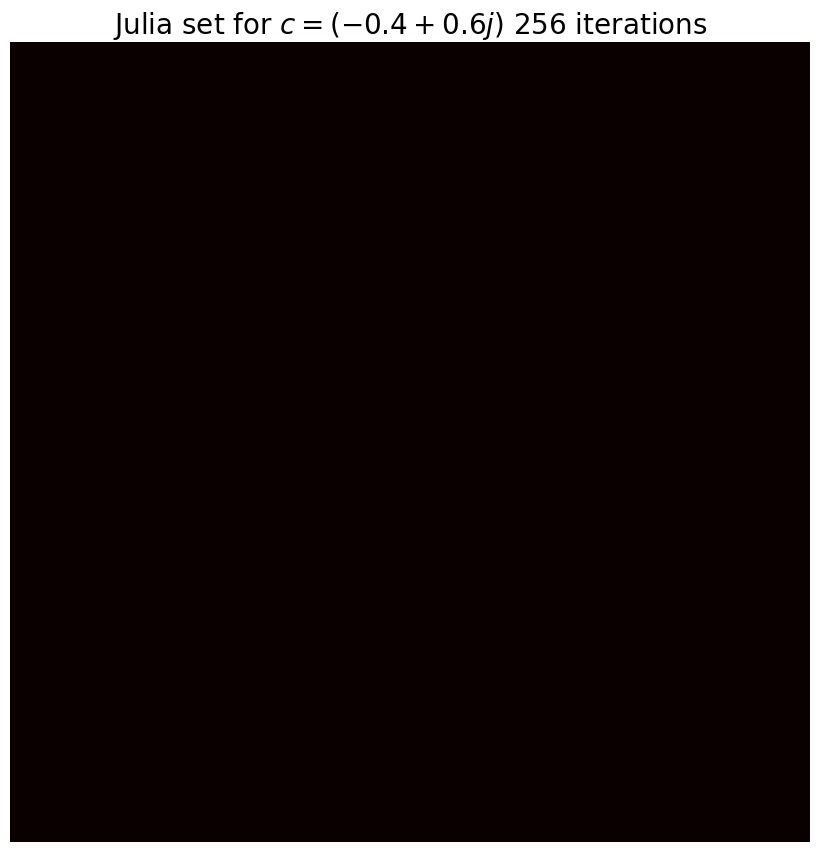

In [24]:
# iterate the Z julia set
c=-0.4+0.6j
num_iters=256
T = iterate_julia_set(Z, c, num_iters)

# plot the resulting fractal
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
ax.set_xticks([])
ax.set_yticks([])

plt.imshow(np.flipud(T), cmap='hot');
title = r'Julia set for $c = %s$ %d iterations' % (c, num_iters)
plt.title(title, fontsize=20);
#plt.savefig('../figures/assg-01-problem-03-result.png');

## Task 4: Pandas
----

In the final task, you are asked to use the `Pandas` library to read in a table of data into
a `DataFrame` and manipulate the data as described.

There is a file in your repository assignments directory, under the `data` subdirectory,
called `../data/assg-01-data.csv` formatted using comma separated values.  This file
contains 15 lines of sales data.  Read the data into a `Pandas` data frame simply named `df`, and display the 
first 5 lines of data using the `head()`
member function.  Display the last 5 lines of the data using the `tail()` member function.

And also use the `describe()` function to get information about the numerical attributes
of the dataframe.

In [25]:
# load dataframe from file here, you are required to use a relative path to load the dataframe from here
df = pd.DataFrame()

In [26]:
# display the first 5 lines of dataframe here

In [27]:
# display the last 5 lines of dataframe here

In [28]:
# describe the numerical attributes of the dataframe here

As you should be able to see, the data consists of some customer sales' information, along with the customer address.  
The data contains sales information for 3 months.

For the next unit test, write a function called `task_4_dataframe_information()` in the
`src/assg_tasks.py` file.  This function will take the dataframe you read in.  Your function will find
out and return the following 3 pieces of information:

- The total sum of sales in the month of Jan
- The minimum sales amount in the month of Feb
- The average (mean) sales for the month of Mar


In [29]:
# do not remove or modify the code in this cell
run_unittests(['test_task_4_dataframe_information'])

test_feb_sales_min (test_assg_tasks.test_task_4_dataframe_information.test_feb_sales_min)
test_feb_sales_min ... FAIL
test_jan_sales_sum (test_assg_tasks.test_task_4_dataframe_information.test_jan_sales_sum)
test_jan_sales_sum ... FAIL
test_mar_sales_avg (test_assg_tasks.test_task_4_dataframe_information.test_mar_sales_avg)
test_mar_sales_avg ... FAIL

FAIL: test_feb_sales_min (test_assg_tasks.test_task_4_dataframe_information.test_feb_sales_min)
test_feb_sales_min
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/defer.py", line 209, in maybeDeferred
    result = f(*args, **kwargs)
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/utils.py", line 227, in runWithWarningsSuppressed
    raise exc_info[1].with_traceback(exc_info[2])
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/utils.py", line 223, in runWithWarningsSuppressed
    resul

<unittest.runner.TextTestResult run=3 errors=0 failures=3>

In [30]:
# the following will run your function and display the information you determined
jan_sales_sum, feb_sales_min, mar_sales_avg = task_4_dataframe_information(df)
print(f"Sum of January  sales: {jan_sales_sum}")
print(f"Min of February sales: {feb_sales_min}")
print(f"Avg of March    sales: {mar_sales_avg}")

Sum of January  sales: 0
Min of February sales: 0
Avg of March    sales: 0


Using pandas data frame operations only again, write a function named `task_4_dataframe_mutate()` in the
`src/assg_tasks.py` file.  This function will again take your data frame, and it will return a new
data frame.  The new dataframe should

- Change the name of the column from `postal-code` to `zipcode`.  Having a - in the name makes it
  unusable as an attribute name, so we might want to fix this.  There will no longer be a
  `zipcode` column in the newly returnd dataframe.
- Add a new column to the new dataframe frame named `total`.  This column should contain the total
    sales for each row for the 3 months of data present (`Jan`, `Feb` and `Mar`).
- Count the total number of missing items in the state and zipcode attributes and return these
  from the function.

In [31]:
# do not remove or modify the code in this cell
run_unittests(['test_task_4_dataframe_mutate'])

test_new_df (test_assg_tasks.test_task_4_dataframe_mutate.test_new_df)
test_new_df ... FAIL
test_num_missing_states (test_assg_tasks.test_task_4_dataframe_mutate.test_num_missing_states)
test_num_missing_states ... FAIL
test_num_missing_zipcodes (test_assg_tasks.test_task_4_dataframe_mutate.test_num_missing_zipcodes)
test_num_missing_zipcodes ... FAIL

FAIL: test_new_df (test_assg_tasks.test_task_4_dataframe_mutate.test_new_df)
test_new_df
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/defer.py", line 209, in maybeDeferred
    result = f(*args, **kwargs)
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/utils.py", line 227, in runWithWarningsSuppressed
    raise exc_info[1].with_traceback(exc_info[2])
  File "/opt/conda/lib/python3.12/site-packages/twisted/internet/utils.py", line 223, in runWithWarningsSuppressed
    result = f(*a, **kw)
  File "/w

<unittest.runner.TextTestResult run=3 errors=0 failures=3>

In [32]:
# the following will run your function to mutate the dataframe column and determine number of missing values
new_df, num_missing_states, num_missing_zipcodes = task_4_dataframe_mutate(df)
print(f"Number of missing states  : {num_missing_states}")
print(f"Number of missing zipcodes: {num_missing_zipcodes}")

Number of missing states  : 0
Number of missing zipcodes: 0


Finally plot the Jan, Feb, Mar and total sales data as bar plots using the `plot()` convenience function
available from a Pandas `DataFrame` using your newly mutated dataframe.

Label your x an y axis on your plot.  Also change the x tick labels to be the account numbers instead
of 0,1,2,...14.  Also give the plot an appropriate title.  You will need to use matplotlib 
functions after you create your bar chart to add the labels and change the tic marks.

In [33]:
# create the asked for plot here using pandas convenience plot functions

**Extra Credit**: Perhaps we would like to have our visualization sorted
by the total sales.  Replot the bar plot but sort the account numbers by their
total sales, so we can more easily see the accounts from the lowest sales to our
highest sales.

In [34]:
# plot again but with the sorted data for extra credit